In [1]:
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
%matplotlib inline

Re, Rm, omega0, q, B0, pi, Q, beta, c1, c2 = symbols("R_e R_m Omega_0 q B_0 pi Q beta c_1 c_2", real=True)
dt, dr, dz = symbols("d_t d_r d_z")
r, z, t  = symbols("r, z, t")
sigma = symbols("sigma")

psi = Function('psi')(t,r,z)
u = Function('u')(t,r,z)
A = Function('A')(t,r,z)
B = Function('B')(t,r,z)

#State vector matrix
V = Matrix([psi, u, A, B])


Assume

$\Omega(r) = c_1 + c_2 r^{-2}$

$\partial_r \Omega(r) = -2c_2 r^{-3}$

where $c_2 = r^2_1 r^2_2 (\Omega_1 - \Omega_2)/(r^2_2 - r^2_1)$


In [2]:
L0 = Matrix([[(1/Re)*((-3/r**4)*dr + (3/r**3)*dr**2 - (2/r**2)*dr**3+(1/r)*dr**4), 0, 0, 0],
            [0, (1/Re)*(dr**2 + (1/r)*dr - (1/r)), 0, 0],
            [0, 0, (1/Rm)*(dr**2 - (1/r)*dr), 0],
            [0, 0, 0, (1/Rm)*(dr**2 + (1/r)*dr - (1/r**2))]])

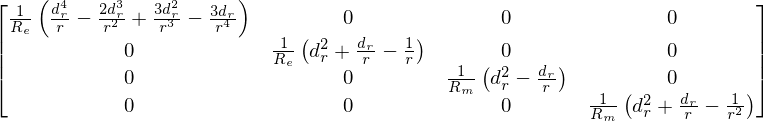

In [3]:
L0

In [4]:
#L1 = Matrix([[0, 3*omega0*r**(-q), (2/beta)*(1/r)*(dr**2 - (1/r)*dr), 0],
#             [-(4/r)*(omega0*r**(-q)) - (-q*omega0*r**(-q-1)), 0, 0, (2/beta)],
#             [1, 0, 0, 0],
#             [0, 1, (2/r)*(omega0*r**(-q)) + (-q*omega0*r**(-q-1)), 0]])

L1 = Matrix([[0, 3*(c1 + c2*r**(-2)), (2/beta)*(1/r)*(dr**2 - (1/r)*dr), 0],
             [-(4/r)*(c1 + c2*r**(-2)) - (-2*c2*r**(-3)), 0, 0, (2/beta)],
             [1, 0, 0, 0],
             [0, 1, (2/r)*(c1 + c2*r**(-2)) + (-2*c2*r**(-3)), 0]])

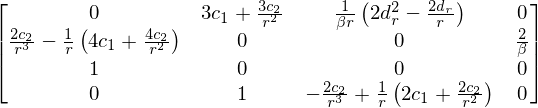

In [5]:
L1

In [6]:
L2 = Matrix([[(1/Re)*((-2/r**2)*dr + (2/r)*dr**2), 0, 0, 0],
             [0, 1/Re, 0, 0],
             [0, 0, 1/Rm, 0],
             [0, 0, 0, 1/Rm]])

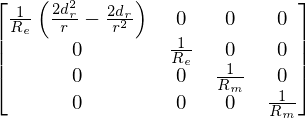

In [7]:
L2

In [8]:
L3 = Matrix([[0, 0, (2/beta)*(1/r), 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]])

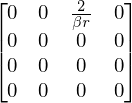

In [9]:
L3

In [10]:
L4 = Matrix([[(1/Re)*(1/r), 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0],
             [0, 0, 0, 0]])

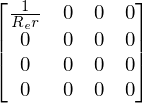

In [11]:
L4

In [12]:
G = Matrix([[0, 0, (2/beta)*(1/r)*(dr**2 - (1/r)*dr), 0],
             [0, 0, 0, (2/beta)],
             [1, 0, 0, 0],
             [0, 1, 0, 0]])

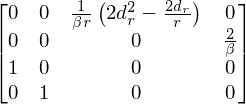

In [13]:
G

In [14]:
L = L0 + L1*dz + L2*dz**2 + L3*dz**3 + L4*dz**4

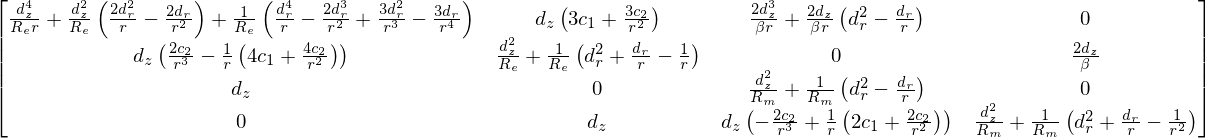

In [15]:
L

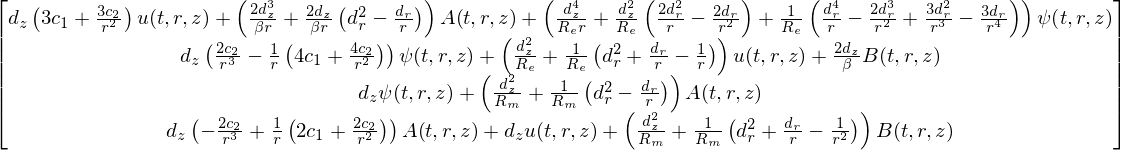

In [16]:
L*V

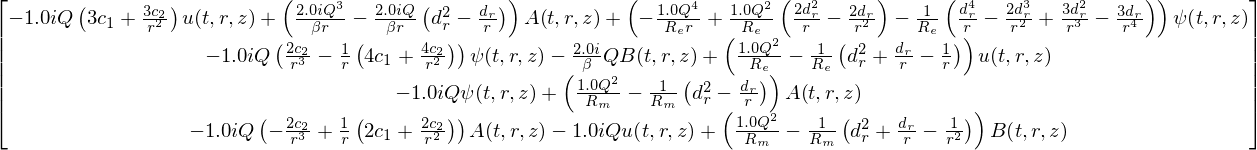

In [17]:
(-L*V).subs(dz, 1j*Q)

In [18]:
D = Matrix([[(1/r)*(dr**2 + dz**2 + (1/r)*dr) - (2/r**2)*dr, 0, 0, 0],
             [0, 1, 0, 0],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

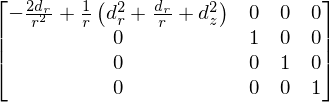

In [19]:
D

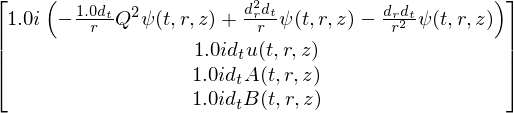

In [20]:
1j*(((D*dt)*V).subs(dz, 1j*Q)).expand()

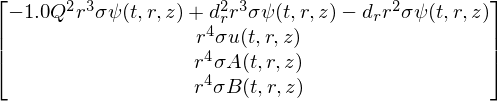

In [21]:
(sigma*(r**4*D*V).subs(dz, 1j*Q)).expand()

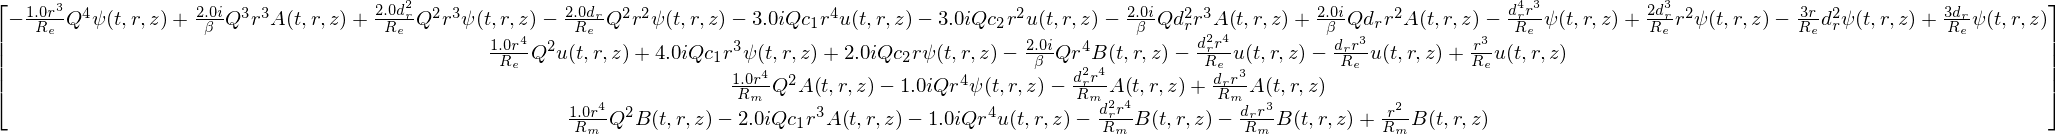

In [22]:
(r**4*(-L*V).subs(dz, 1j*Q)).expand()

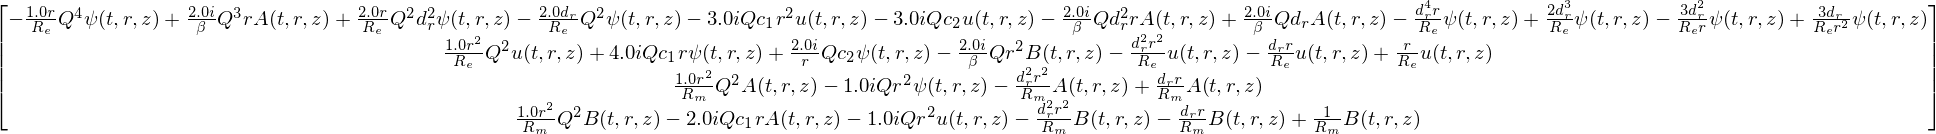

In [23]:
(r**2*(-L*V).subs(dz, 1j*Q)).expand()

In [40]:
Identity_matrix = Matrix([[1, 0, 0, 0],
             [0, 1, 0, 0],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

In [42]:
M = (L - sigma*Identity_matrix).subs(dz, 1j*Q)

In [43]:
nokr = M.subs(dr, 0)

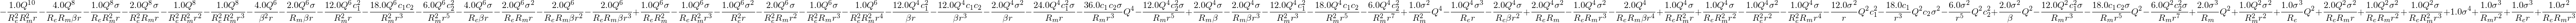

In [44]:
nokr.det()